## Day 83 Lecture 2 Assignment

In this assignment, we will learn about other optimization algorithms. We will create a neural network and try out the different optimization algorithms and compare their performance.

In [41]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping

In this assignment, we will be using the cancer data that we have worked with in previous lessons. The pre-processed data is loaded below.

In [2]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/cancer_processed.csv')

In [3]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


As you may recall, diagnosis is the target variable. One hot encode the diagnosis column.

In [15]:
# Answer below:
cancer.diagnosis = np.where(cancer.diagnosis =='M', 1, 0)
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


Split the data into train and test with 20% of the data in test.

In [16]:
# Answer below
from sklearn.model_selection import train_test_split

y = cancer.diagnosis
X = cancer.drop(columns='diagnosis')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Scale all other variables using the standard scaler.

In [17]:
# Answer below:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Generate a sequential model consisting of 5 layers. The layers should be of size 128, 64, 32, 32, 1. Use the appropriate activation for the output layer based on the type of prediction algorithm we are producing.

In [35]:
# Answer below

def five_layer_model(optimizer, epochs, batch_size):
  model = Sequential()
  es = EarlyStopping(monitor='val_loss', verbose=1)

  model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test), callbacks=[es])
  model_df = pd.DataFrame(history.history)
  ax=model_df[['accuracy', 'val_accuracy', 'loss', 'val_loss']].plot(figsize=(15,10))


Initialize a SGD optimizer with learning rate 0.05 and momentum 0.9.

In [36]:
# Answer below:
sgd = SGD(learning_rate=0.05, momentum=0.9)


Compile and fit the model using the appropriate loss function and metric and use the optimizers defined above.

batch size = 100, epochs = 200

Epoch 1/200
5/5 [==============================] - 1s 57ms/step - loss: 0.6778 - accuracy: 0.6030 - val_loss: 0.5746 - val_accuracy: 0.8333
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.5212 - accuracy: 0.8656 - val_loss: 0.3715 - val_accuracy: 0.8947
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 0.2838 - accuracy: 0.9364 - val_loss: 0.1954 - val_accuracy: 0.9386
Epoch 4/200
5/5 [==============================] - 0s 51ms/step - loss: 0.1643 - accuracy: 0.9374 - val_loss: 0.1840 - val_accuracy: 0.9386
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1595 - accuracy: 0.9320 - val_loss: 0.2274 - val_accuracy: 0.9123
Epoch 00005: early stopping


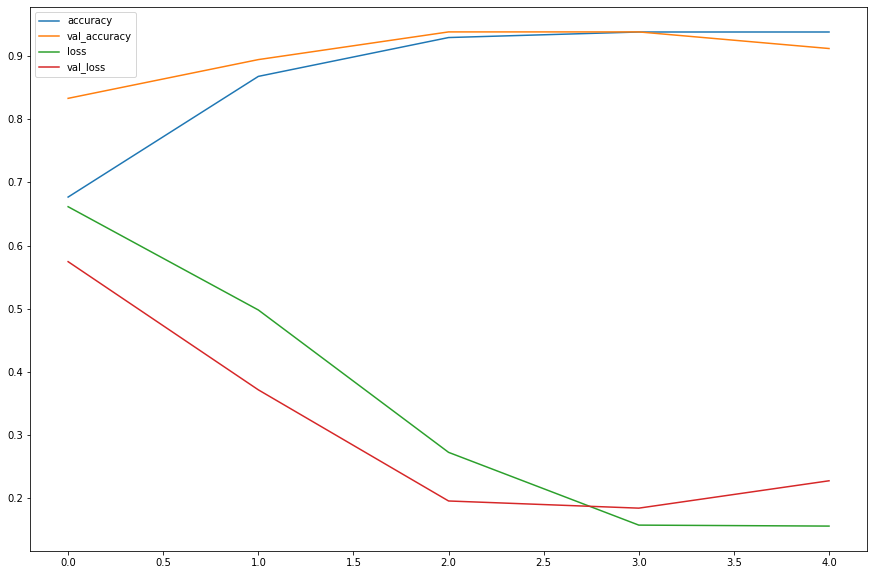

In [37]:
# Answer below:
five_layer_model(sgd, 200, 100)

Define the RMSprop optimizer with a learning rate of 0.05.

In [39]:
# Answer below:
rms = RMSprop(learning_rate=0.05)

Compile and fit the model using the optimizer defined above. What do you notice about the accuracy?

Epoch 1/200
5/5 [==============================] - 1s 56ms/step - loss: 11.0982 - accuracy: 0.4485 - val_loss: 0.5692 - val_accuracy: 0.8421
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 0.4129 - accuracy: 0.8840 - val_loss: 0.2530 - val_accuracy: 0.9298
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1789 - accuracy: 0.9453 - val_loss: 0.2924 - val_accuracy: 0.9035
Epoch 00003: early stopping


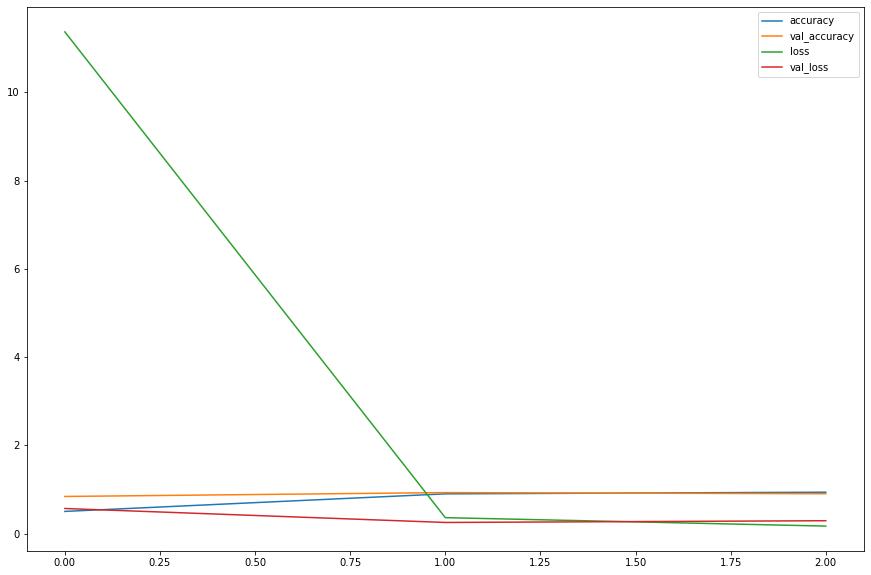

In [49]:
# Answer below:
five_layer_model(rms, 200, 100)

Define the Adam optimizer with learning rate 0.01

In [45]:
# Answer below:
adam = Adam(learning_rate=0.01)

Compile and fit the model using the optimizer defined above. How does the peformance differ with this optimizer?

We get better accuracy and a lower loss, than with RMSprop.

Epoch 1/200
5/5 [==============================] - 1s 60ms/step - loss: 0.5113 - accuracy: 0.8286 - val_loss: 0.2257 - val_accuracy: 0.9298
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1642 - accuracy: 0.9454 - val_loss: 0.2217 - val_accuracy: 0.9123
Epoch 3/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1528 - accuracy: 0.9544 - val_loss: 0.1210 - val_accuracy: 0.9561
Epoch 4/200
5/5 [==============================] - 0s 17ms/step - loss: 0.1070 - accuracy: 0.9542 - val_loss: 0.1892 - val_accuracy: 0.9298
Epoch 00004: early stopping
--- 1.1021552085876465 seconds ---


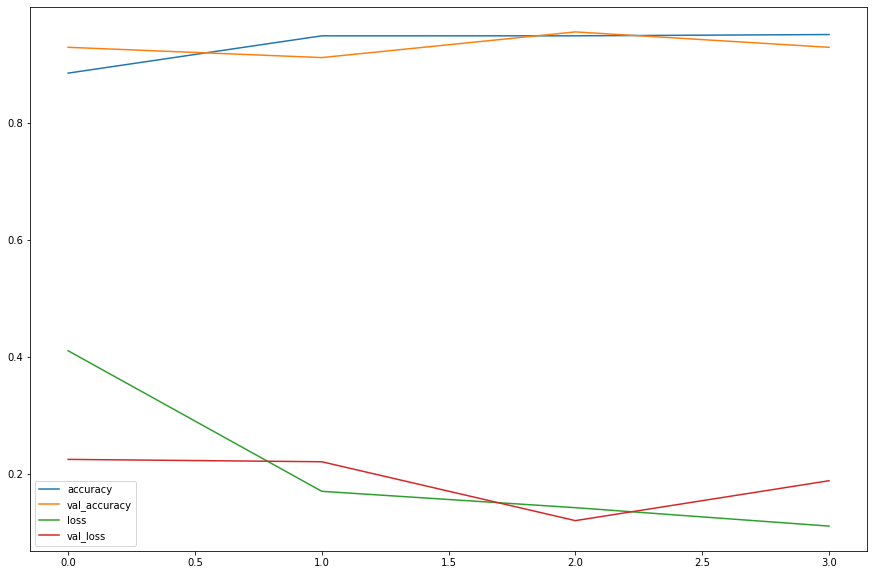

In [46]:
# Answer below:
import time

start_time = time.time()
five_layer_model(adam, 200, 100)
print("--- %s seconds ---" % (time.time() - start_time))

Now change the learning rate to 0.1 in your Adam optimizer and compare the results (both speed and accuracy).

Increasing the learning rate, decreased the execution time of our program, but we sacrificed the accuracy of predictions.

Epoch 1/200
5/5 [==============================] - 1s 62ms/step - loss: 8.9995 - accuracy: 0.5178 - val_loss: 0.4259 - val_accuracy: 0.9035
Epoch 2/200
5/5 [==============================] - 0s 19ms/step - loss: 0.4314 - accuracy: 0.8791 - val_loss: 0.4722 - val_accuracy: 0.7807
Epoch 00002: early stopping
--- 0.9929502010345459 seconds ---


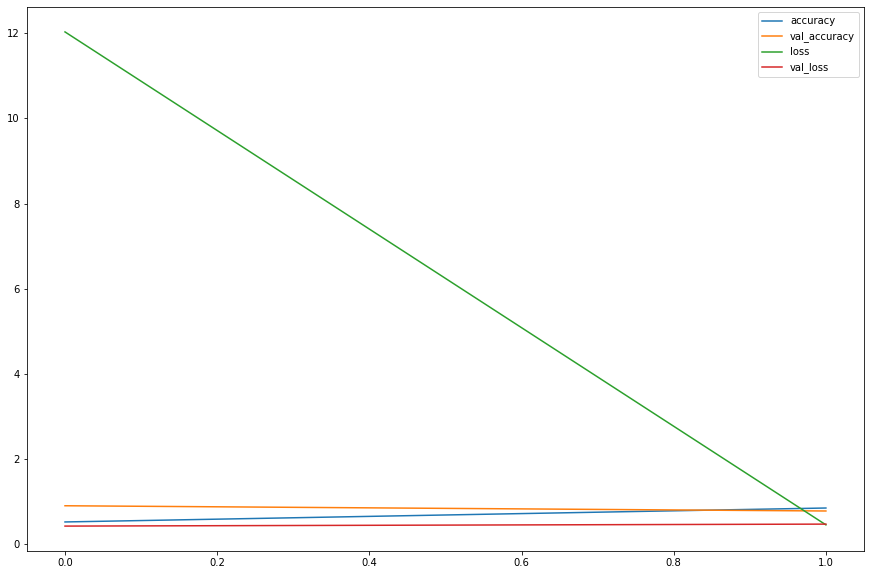

In [47]:
# Answer below:
adam = Adam(learning_rate=0.1)

start_time = time.time()
five_layer_model(adam, 200, 100)
print("--- %s seconds ---" % (time.time() - start_time))